In [86]:
import os
cwd = os.getcwd()
print(cwd)

/Users/wurobin/Documents/Myfolder/機器學習/Python_train


In [87]:
# Load in our libraries
import pandas as pd
import numpy as np
import os
import seaborn as sns
import matplotlib.pyplot as plt


cwd = os.getcwd()
print(cwd)


train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

/Users/wurobin/Documents/Myfolder/機器學習/Python_train


In [88]:
train.head(6)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q


In [89]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


### dropna 排掉特定欄位有null的資料列

In [90]:
train_exclude_age_null = train.dropna(subset=["Age"])
train_exclude_age_null = train_exclude_age_null.dropna(subset=["Embarked"])
train.dropna(subset=["Age"]).head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [91]:
train_exclude_age_null.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    712 non-null int64
Survived       712 non-null int64
Pclass         712 non-null int64
Name           712 non-null object
Sex            712 non-null object
Age            712 non-null float64
SibSp          712 non-null int64
Parch          712 non-null int64
Ticket         712 non-null object
Fare           712 non-null float64
Cabin          183 non-null object
Embarked       712 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


### 把欄位轉為Dummy欄位

In [92]:
train_exclude_age_null_dummy = pd.get_dummies(train_exclude_age_null, columns=['Sex','Embarked'])
train_exclude_age_null_dummy.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1


### exclude outlier

In [104]:
print(train_exclude_age_null_dummy.describe())


Q1 = train_exclude_age_null_dummy.quantile(0.25)
Q3 = train_exclude_age_null_dummy.quantile(0.75)
IQR = Q3 - Q1

print(Q1["Fare"])
print(Q3["Fare"])
print(IQR["Fare"])

IQR

       PassengerId    Survived      Pclass         Age       SibSp  \
count   712.000000  712.000000  712.000000  712.000000  712.000000   
mean    448.589888    0.404494    2.240169   29.642093    0.514045   
std     258.683191    0.491139    0.836854   14.492933    0.930692   
min       1.000000    0.000000    1.000000    0.420000    0.000000   
25%     222.750000    0.000000    1.000000   20.000000    0.000000   
50%     445.000000    0.000000    2.000000   28.000000    0.000000   
75%     677.250000    1.000000    3.000000   38.000000    1.000000   
max     891.000000    1.000000    3.000000   80.000000    5.000000   

            Parch        Fare  Sex_female    Sex_male  Embarked_C  Embarked_Q  \
count  712.000000  712.000000  712.000000  712.000000  712.000000  712.000000   
mean     0.432584   34.567251    0.363764    0.636236    0.182584    0.039326   
std      0.854181   52.938648    0.481420    0.481420    0.386597    0.194506   
min      0.000000    0.000000    0.000000    

PassengerId    454.500000
Survived         1.000000
Pclass           2.000000
Age             18.000000
SibSp            1.000000
Parch            1.000000
Fare            24.950000
Sex_female       1.000000
Sex_male         1.000000
Embarked_C       0.000000
Embarked_Q       0.000000
Embarked_S       0.000000
Fare_pre        65.434138
dtype: float64

In [105]:
train_exclude_age_null_dummy_exclude_fare_outlier = train_exclude_age_null_dummy[(train_exclude_age_null_dummy["Fare"]>=Q1["Fare"]-IQR["Fare"]*1.5) & (train_exclude_age_null_dummy["Fare"]<=Q3["Fare"]+IQR["Fare"]*1.5)]



In [106]:
import numpy as np
import matplotlib.pyplot as plt

from sklearn import linear_model
reg = linear_model.LinearRegression()

#x = train_exclude_age_null_dummy[["Pclass","Age","SibSp","Parch","Sex_female","Sex_male","Embarked_C","Embarked_Q","Embarked_S"]]#age & deposit_amt
x = train_exclude_age_null_dummy_exclude_fare_outlier[["Pclass","Age","SibSp","Parch","Sex_female","Sex_male"]]#age & deposit_amt
y = train_exclude_age_null_dummy_exclude_fare_outlier[["Fare"]]


reg.fit(x,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [107]:
import pandas as pd

a = reg.intercept_
print("intercept: {0}".format(a))

a = reg.coef_
print("coef_: {0}".format(a))

a = x.columns
print("columns: {0}".format(a))

#pd.DataFrame(reg.coef_ , x.columns, columns=['Coeffecient'])

pd.DataFrame([-1.31057293e+01,  2.95302816e-03,  5.18698534e+00,  4.38318886e+00,
   9.46721139e-02, -9.46721139e-02] ['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], columns=['Coeffecient'])

intercept: [46.45111791]
coef_: [[-1.31057293e+01  2.95302816e-03  5.18698534e+00  4.38318886e+00
   9.46721139e-02 -9.46721139e-02]]
columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], dtype='object')


,Coeffecient
Pclass,-36.494474
Age,-0.198811
SibSp,5.321210
Parch,10.191165
Sex_female,2.148460
Sex_male,-2.148460


In [95]:
train_exclude_age_null_dummy.head(3)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1


In [96]:
train_exclude_age_null_dummy['Fare_pre'] = reg.predict(x)
train_exclude_age_null_dummy.head(5)

,PassengerId,Survived,Pclass,Name,Age,SibSp,Parch,Ticket,Fare,Cabin,Sex_female,Sex_male,Embarked_C,Embarked_Q,Embarked_S,Fare_pre
0,1,0,3,"Braund, Mr. Owen Harris",22.0,1,0,A/5 21171,7.2500,NaN,0,1,0,0,1,4.971199
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",38.0,1,0,PC 17599,71.2833,C85,1,0,1,0,0,79.076094
2,3,1,3,"Heikkinen, Miss. Laina",26.0,0,0,STON/O2. 3101282,7.9250,NaN,1,0,0,0,1,3.151665
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",35.0,1,0,113803,53.1000,C123,1,0,0,0,1,79.672526
4,5,0,3,"Allen, Mr. William Henry",35.0,0,0,373450,8.0500,NaN,0,1,0,0,1,-2.934552


In [97]:
reg.score(x,y) #驗證模型正確性,不同模型有不同的驗證指標
                     #linearRegression預設使用決定係數(R2)當作指標,越接近1越好

0.36808745757492506

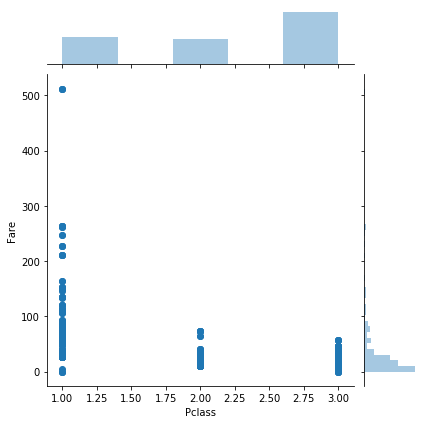

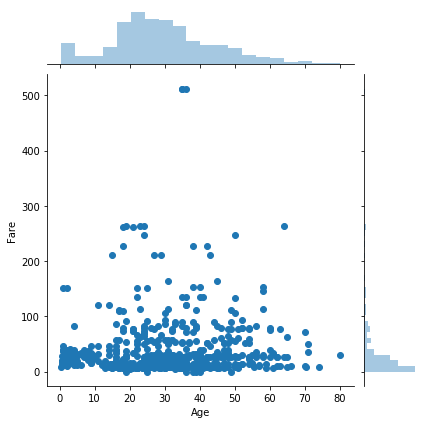

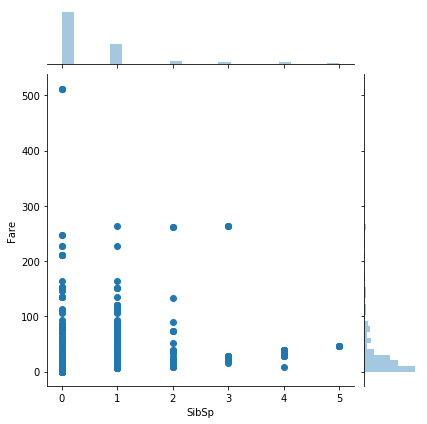

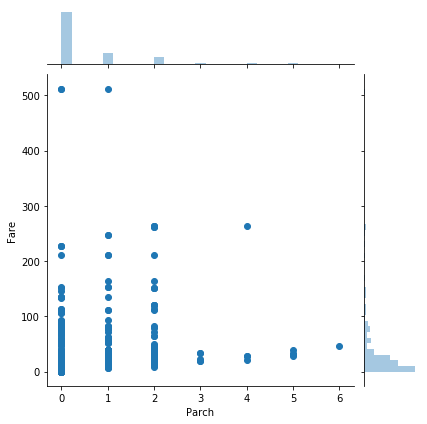

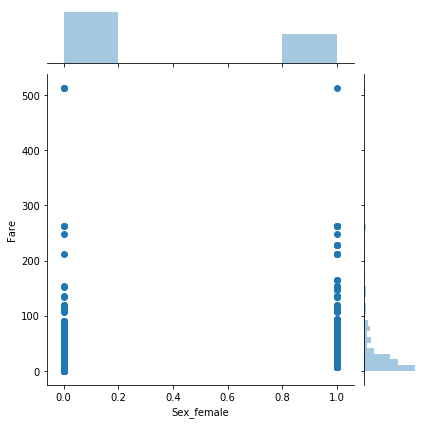

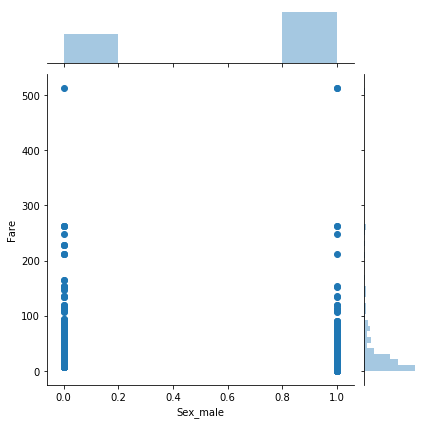

In [101]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns #Visualization

#columns: Index(['Pclass', 'Age', 'SibSp', 'Parch', 'Sex_female', 'Sex_male'], dtype='object
sns.jointplot(x='Pclass',y ='Fare', data = train_exclude_age_null_dummy)
sns.jointplot(x='Age',y ='Fare', data = train_exclude_age_null_dummy)
sns.jointplot(x='SibSp',y ='Fare', data = train_exclude_age_null_dummy)
sns.jointplot(x='Parch',y ='Fare', data = train_exclude_age_null_dummy)
sns.jointplot(x='Sex_female',y ='Fare', data = train_exclude_age_null_dummy)
sns.jointplot(x='Sex_male',y ='Fare', data = train_exclude_age_null_dummy)